# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [24]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [25]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

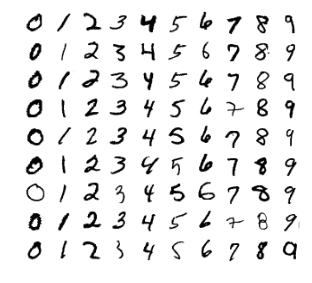

In [26]:
#def P1(num_examples=10):

### STUDENT START ###
#fig = plt.figure()
#
#for x in range(1,101):
#    plt.subplot(10,10,x).axis('off')
#    img = mini_train_data[x,:].reshape((28,28))
#    plt.imshow(img,cmap=plt.cm.gray_r)

q=1
fig = plt.figure(figsize=(5,5))
for x in (1,6001,15001,20001,25001,35001,40001,45001,50001,55001,
          2,6002,15002,20002,25002,35002,40002,45002,50002,55002,
          3,6003,15003,20003,25003,35003,40003,45003,50003,55003,
          4,6004,15004,20004,25004,35004,40004,45004,50004,55004,
          5,6005,15005,20005,25005,35005,40005,45005,50005,55005,
          6,6006,15006,20006,25006,35006,40006,45006,50006,55006,
          7,6007,15007,20007,25007,35007,40007,45007,50007,55007,
          8,6008,15008,20008,25008,35008,40008,45008,50008,55008,
          9,6009,15009,20009,25009,35009,40009,45009,50009,55009,
         ):
    plt.subplot(10,10,q).axis('off')
    img = mnist.data[x,:].reshape((28,28))
    plt.imshow(img,cmap=plt.cm.gray_r)
    q+=1

### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [27]:
#def P2(k_values):

    ### STUDENT START ###
print "Classification Reprot for KNN(1):"
clf = KNeighborsClassifier(1)
clf.fit(mini_train_data, mini_train_labels)
y_pred = clf.predict(dev_data)
#print(y_pred.score)
#print("Accuracy:", clf.fit(mini_train_data, mini_train_labels).score(dev_labels,y_pred))
accuracy = clf.fit(mini_train_data,mini_train_labels).score(dev_data,dev_labels)

print(classification_report(dev_labels,y_pred))

####################################################

for i in [1,3,5,7,9]:
    clf = KNeighborsClassifier(i)
    clf.fit(mini_train_data, mini_train_labels)
    y_pred = clf.predict(dev_data)
    accuracy = clf.fit(mini_train_data,mini_train_labels).score(dev_data,dev_labels)
    print "Accuracy KNN(%d): %0.3f" % (i,accuracy)


    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

Classification Reprot for KNN(1):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy KNN(1): 0.888
Accuracy KNN(3): 0.878
Accuracy KNN(5): 0.869
Accuracy KNN(7): 0.865
Accuracy KNN(9): 0.863


ANSWER: Digit 9 is the most difficult (lowest f1-score)

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [28]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

##############################################################################################
accuracies = []
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

for x in train_sizes:
    a = time.time()
    clf = KNeighborsClassifier(1)
    temp_train_data = mini_train_data[:x]
    temp_train_labels = mini_train_labels[:x]
    clf.fit(temp_train_data, temp_train_labels)
    y_pred = clf.predict(dev_data)
    #print(classification_report(dev_labels,y_pred))
    b = time.time()

    c = b-a

    print('test size = %s:') % x
    #print(x)
    print('   %.2f seconds' % c)

    #acc = accuracy_score(clf, y_pred)
    #print acc
    accuracy = clf.fit(temp_train_data,temp_train_labels).score(dev_data,dev_labels)
    print ('   accuracy: %.2f' % accuracy)
    print ( ' ' )
    accuracies.append(accuracy)


### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

test size = 100:
   0.45 seconds
   accuracy: 0.72
 
test size = 200:
   0.91 seconds
   accuracy: 0.79
 
test size = 400:
   1.86 seconds
   accuracy: 0.84
 
test size = 800:
   3.82 seconds
   accuracy: 0.88
 
test size = 1600:
   5.86 seconds
   accuracy: 0.89
 
test size = 3200:
   5.76 seconds
   accuracy: 0.89
 
test size = 6400:
   5.87 seconds
   accuracy: 0.89
 
test size = 12800:
   5.98 seconds
   accuracy: 0.89
 
test size = 25000:
   5.79 seconds
   accuracy: 0.89
 


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [29]:
#def P4():

### STUDENT START ###


train_sizes_1 = [[100], [200], [400], [800], [1600], [3200], [6400], [12800], [25000]]

regr = LinearRegression()
regr.fit(train_sizes_1,accuracies)
y_pred = regr.predict(60000)
print("prediction for n=6000 (normal):  %0.3f") % y_pred




#log_accuracies = (np.log(accuracies))
log_accuracies = np.power(accuracies,(1/3))
  

train_sizes_1 = [[100], [200], [400], [800], [1600], [3200], [6400], [12800], [25000]]

#plt.plot(train_sizes_1,log_accuracies)
regr = LinearRegression()
regr.fit(train_sizes_1,log_accuracies)
y_pred = regr.predict(60000)
#print("prediction for n=6000 (adjusted):  %0.3f") % np.exp(y_pred)
print("prediction for n=6000 (adjusted):  %0.3f") % np.power(y_pred,3)


### STUDENT END ###

#P4()

prediction for n=6000 (normal):  1.021
prediction for n=6000 (adjusted):  1.000


ANSWER: The regression value is greater than 1. A cube root transformation drops the value back to 1.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix for 1-NN
[[ 97   0   4   1   0   2   1   1   0   1]
 [  0 105   4   0   2   0   1   4   2   0]
 [  0   0  81   0   0   0   1   0   0   0]
 [  0   0   4  75   0   9   0   1   5   3]
 [  0   0   0   0  85   0   1   1   0   9]
 [  0   0   0   3   0  76   0   0   2   1]
 [  2   0   0   0   3   0  94   0   1   0]
 [  0   0   4   3   0   1   0 104   0   5]
 [  0   0   3   1   0   1   0   0  84   0]
 [  0   0   2   3  14   2   0   2   2  87]]
 
 
examples of mismatched digits:


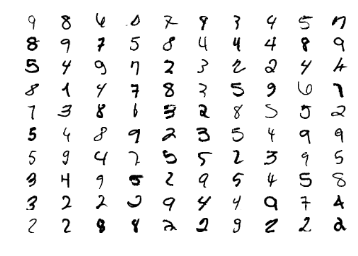

In [30]:
#def P5():

### STUDENT START ###


clf = KNeighborsClassifier(1)
temp_train_data = mini_train_data[:25000]
temp_train_labels = mini_train_labels[:25000]
clf.fit(temp_train_data, temp_train_labels)
y_pred = clf.predict(dev_data)
#print y_pred  

cm = confusion_matrix(y_pred,dev_labels)
print("Confusion Matrix for 1-NN")
print(cm)



mismatch = []

len(dev_labels)
for x in range(1,1000):
    if y_pred[x] != dev_labels[x]:
        
        mismatch.append(x)


print " "
print " "
print "examples of mismatched digits:"
    
mismatch_set = mismatch[:100]
fig = plt.figure()
q = 1
for x in mismatch_set:
    plt.subplot(10,10,q).axis('off')
    img = dev_data[x,:].reshape((28,28))
    plt.imshow(img,cmap=plt.cm.gray_r)
    q+=1


### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

blurred: dev, normal: training
----------------------------------------
blurred: training, normal: dev
----------------------------------------
blurred: training & dev, normal: none


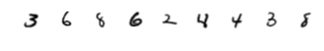

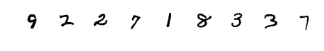

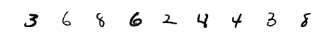

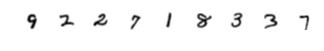

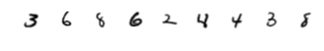

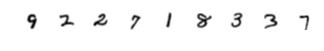

In [31]:
#def P6():
    
### STUDENT START ###

def blur_digits(y):
    def extra_point(x):
        if -1 in x: return
        try:
            points.append(y[x[0]][x[1]])
        except:
            pass
        
    y = y.reshape(28, 28)
    blurred_img = np.ndarray(shape=(784))
    for i in range(28):
        for j in range(28):
            points = [y[i][j]]            
            extra_point((i+1, j  ))
            extra_point((i-1, j  ))
            extra_point((i,   j+1))
            extra_point((i,   j-1))
            extra_point((i+1, j+1))
            extra_point((i-1, j-1))
            extra_point((i+1, j-1))
            extra_point((i-1, j+1))
            blurred_img[28*i+j] = sum(points)/len(points)

    return blurred_img
    
    
    
############################################################ 
print "blurred: dev, normal: training"
fig = plt.figure()
q = 1
for x in range(1,10):
    plt.subplot(10,10,q).axis('off')
    img = blur_digits(dev_data[x,:])
    plt.imshow(img.reshape((28,28)),cmap=plt.cm.gray_r)
    q+=1    
    
fig = plt.figure()
q = 1
for x in range(1,10):
    plt.subplot(10,10,q).axis('off')
    img = train_data[x,:].reshape((28,28))
    plt.imshow(img,cmap=plt.cm.gray_r)
    q+=1
############################################################ 

############################################################ 
print "----------------------------------------"
print "blurred: training, normal: dev"
fig = plt.figure()
q = 1
for x in range(1,10):
    plt.subplot(10,10,q).axis('off')
    img = dev_data[x,:].reshape((28,28))
    plt.imshow(img,cmap=plt.cm.gray_r)
    q+=1    
    
fig = plt.figure()
q = 1
for x in range(1,10):
    plt.subplot(10,10,q).axis('off')
    img = blur_digits(train_data[x,:])
    plt.imshow(img.reshape((28,28)),cmap=plt.cm.gray_r)
    q+=1
############################################################ 

############################################################ 
print "----------------------------------------"
print "blurred: training & dev, normal: none"
fig = plt.figure()
q = 1
for x in range(1,10):
    plt.subplot(10,10,q).axis('off')
    img = blur_digits(dev_data[x,:])
    plt.imshow(img.reshape((28,28)),cmap=plt.cm.gray_r)
    q+=1    
    
fig = plt.figure()
q = 1
for x in range(1,10):
    plt.subplot(10,10,q).axis('off')
    img = blur_digits(train_data[x,:])
    plt.imshow(img.reshape((28,28)),cmap=plt.cm.gray_r)
    q+=1
############################################################ 

### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [32]:
#def P7():

### STUDENT START ###

#X = dev_data 
#Y = dev_labels 

a_binarize = np.zeros(shape=(1000,784))

for i in range(1,1000):
    for j in range(1,784):
        if dev_data[i,j] < 0.5:
            a_binarize[i,j] = 0
        else:
            a_binarize[i,j] = 1
            

clf = BernoulliNB()
clf.fit(a_binarize, dev_labels)
y_pred = clf.predict(dev_data)
accuracy = clf.fit(a_binarize, dev_labels).score(dev_data,dev_labels)
print "Accuracy of BernoulliNB: %0.3f" % accuracy

#accuracy(sk_classifier,dev_data)
### STUDENT END ###

#P7()

Accuracy of BernoulliNB: 0.822


In [33]:

a_trinarize = np.zeros(shape=(1000,784))

for i in range(1,1000):
    for j in range(1,784):
        if dev_data[i,j] < 0.333:
            a_trinarize[i,j] = 0
        elif dev_data[i,j] > 0.666:
            a_trinarize[i,j] = 2
        else:
            a_trinarize[i,j] = 1

#plt.hist(a_trinarize[1])

clf = MultinomialNB()
clf.fit(a_trinarize, dev_labels)
y_pred = clf.predict(dev_data)
accuracy = clf.fit(a_trinarize, dev_labels).score(dev_data,dev_labels)
print "Accuracy of MultinomialNB: %0.3f" % accuracy


Accuracy of MultinomialNB: 0.843


ANSWER: Multinomial does improve the results slightly. This marginal improvement is expected because there is more granularity with 3 options (0,1,2) rather than 2 (0,1), for matching. However, there is only marginal improvement because the extra granularity does not add that much value.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [34]:
#def P8(alphas):

### STUDENT START ###

parameters = [{'alpha':np.linspace(0,1,101)}]

clf = GridSearchCV(BernoulliNB(), parameters, scoring='f1_weighted')
clf.fit(dev_data,dev_labels) # running the grid search

print "best alpha value: %0.3f" % clf.best_params_['alpha']
print "accuracy with best alpha value: %0.3f" %clf.best_score_
#print clf.best_estimator_

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)


best alpha value: 0.020
accuracy with best alpha value: 0.821


In [35]:
X = [(f1m, p['alpha']) 
            for p, f1m, f1s in clf.grid_scores_]

print "alpha: %0.1f" % X[0][1]
print "accuracy: %0.3f" % X[0][0]

alpha: 0.0
accuracy: 0.018


ANSWER: Yes, this is expected because alpha=0 does not contain any smoothing (so it is more difficult to match pixels exactly)

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [36]:
#def P9():

### STUDENT END ###
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)

score = clf.score(dev_data, dev_labels)
print "Original score: %0.2f" % (score,)

thetas = clf.theta_.reshape(len(clf.theta_) * len(clf.theta_[1]))
sigmas = clf.sigma_.reshape(len(clf.sigma_) * len(clf.sigma_[1]))            


### STUDENT END ###

#gnb = P9()

Original score: 0.63


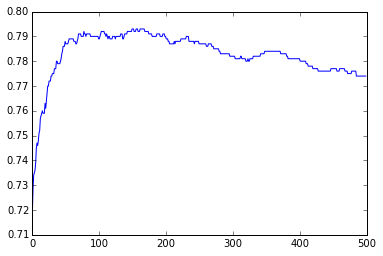

sigma that maximizes score: 0.0149


In [37]:
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)

score = clf.score(dev_data, dev_labels)
#print score

b = list()
for i in range(1,500):
    clf.sigma_ = clf.sigma_ + 0.0001
    score = clf.score(dev_data, dev_labels)
    #print 0.1*i
    #print score
    b.append(score)
    
plt.plot(b)
plt.show()

#print "sigma that maximizes score: %0.5f" % b.index(max(b))*0.0001
best_sigma = b.index(max(b))*0.0001
print "sigma that maximizes score: %s" % best_sigma

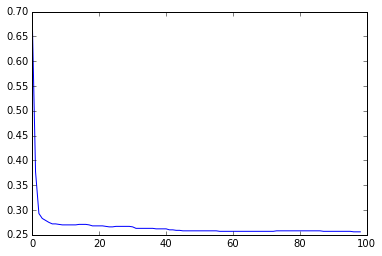

theta that maximizes score: 0.0


In [38]:
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)

score = clf.score(dev_data, dev_labels)
#print score

bb = list()
for i in range(1,100):
    clf.theta_ = clf.theta_ + 0.0001
    score = clf.score(dev_data, dev_labels)
    #print 0.1*i
    #print score
    bb.append(score)
    
plt.plot(bb)
plt.show()

best_theta = bb.index(max(bb))*0.0001
print "theta that maximizes score: %s" % best_theta

In [39]:
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)

score = clf.score(dev_data, dev_labels)

clf.sigma_ += 0.0149
clf.theta_ += 0.00

score = clf.score(dev_data, dev_labels)
print "adjusted score: %0.3f" % score

adjusted score: 0.792


ANSWER: By increasing theta (variance), we are able to increase our score. Changing the mean resulted in a poorer score, so we leave it at 0.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

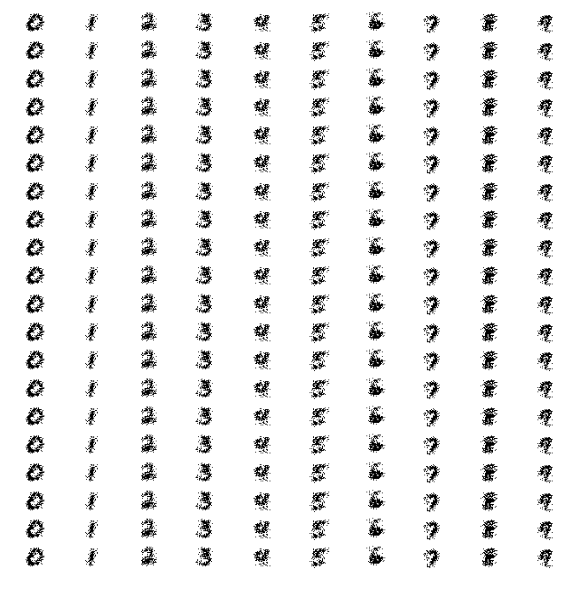

In [40]:
#def P10(num_examples):

### STUDENT START ###
clf = BernoulliNB()
clf.fit(test_data, test_labels)
#print(clf.fit)
c = (np.exp(clf.feature_log_prob_))

figure = plt.figure(figsize=(10,10))

q = 1
for j in ([0,1,2,3,4,5,6,7,8,9]*20):
    d = c[j]
    w = np.random.rand(784)

    for i in range(1,784):
        # w = np.random.rand(1)
        if d[i] > w[i]:
            d[i] = 1
        else:
            d[i] = 0


    plt.subplot(20,10,q).axis('off')
    img = d.reshape((28,28))
    plt.imshow(img,cmap=plt.cm.gray_r)
    q+=1

###posterior probabilities distirbution...feature_log_prob...10 probabilities for each digit...
###probabilities as a vector/array...uniform number for 0-9...whichever one is hit...<0.5 = 0, >0.5 = 1
###continuous

### STUDENT END ###

#P10(20)

ANSWER: The digits are barely discernable, but you can tell that they are the correct digits based on the general shape.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [41]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
clf = BernoulliNB(alpha=0.001)
clf.fit(dev_data, dev_labels)


max_pred = np.amax(clf.predict_proba(dev_data), axis=1)

#plt.hist(max_pred,bins=50)
#plt.show()


pred_zero_point_five = []
pred_zero_point_five_correct = []
pred_zero_point_five_correct_1 = []
pred_zero_point_nine = []
pred_zero_point_nine_correct = []
pred_zero_point_nine_correct_1 = []
pred_zero_point_nine_1 = []
pred_zero_point_nine_1_correct = []
pred_zero_point_nine_1_correct_1 = []
pred_zero_point_nine_2 = []
pred_zero_point_nine_2_correct = []
pred_zero_point_nine_2_correct_1 = []
pred_zero_point_nine_3 = []
pred_zero_point_nine_3_correct = []
pred_zero_point_nine_3_correct_1 = []
pred_zero_point_nine_4 = []
pred_zero_point_nine_4_correct = []
pred_zero_point_nine_4_correct_1 = []
pred_zero_point_nine_5 = []
pred_zero_point_nine_5_correct = []
pred_zero_point_nine_5_correct_1 = []
pred_zero_point_nine_6 = []
pred_zero_point_nine_6_correct = []
pred_zero_point_nine_6_correct_1 = []
pred_zero_point_one = []
pred_zero_point_one_correct = []
pred_zero_point_one_correct_1 = []

###########################################################################
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.5:
        pred_zero_point_five.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.5:
        pred_zero_point_five_correct.append(i)

for i in range(1,len(pred_zero_point_five_correct)):
    if clf.predict(dev_data)[pred_zero_point_five_correct[i]] == dev_labels[pred_zero_point_five_correct[i]]:
        pred_zero_point_five_correct_1.append(i)
###########################################################################
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.9:
        pred_zero_point_nine.append(max_pred[i])

for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.9:
        pred_zero_point_nine_correct.append(i)
    
for i in range(0,len(pred_zero_point_nine_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_correct[i]] == dev_labels[pred_zero_point_nine_correct[i]]:
        pred_zero_point_nine_correct_1.append(i)
#############################################################################
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.999:
        pred_zero_point_nine_1.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.999:
        pred_zero_point_nine_1_correct.append(i)

for i in range(0,len(pred_zero_point_nine_1_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_1_correct[i]] == dev_labels[pred_zero_point_nine_1_correct[i]]:
        pred_zero_point_nine_1_correct_1.append(i)
###########################################################################        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.99999:
        pred_zero_point_nine_2.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.99999:
        pred_zero_point_nine_2_correct.append(i)

for i in range(0,len(pred_zero_point_nine_2_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_2_correct[i]] == dev_labels[pred_zero_point_nine_2_correct[i]]:
        pred_zero_point_nine_2_correct_1.append(i)        
###########################################################################        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.9999999:
        pred_zero_point_nine_3.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.9999999:
        pred_zero_point_nine_3_correct.append(i)

for i in range(0,len(pred_zero_point_nine_3_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_3_correct[i]] == dev_labels[pred_zero_point_nine_3_correct[i]]:
        pred_zero_point_nine_3_correct_1.append(i)        
###########################################################################        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.999999999:
        pred_zero_point_nine_4.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.999999999:
        pred_zero_point_nine_4_correct.append(i)

for i in range(0,len(pred_zero_point_nine_4_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_4_correct[i]] == dev_labels[pred_zero_point_nine_4_correct[i]]:
        pred_zero_point_nine_4_correct_1.append(i)        
###########################################################################        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.99999999999:
        pred_zero_point_nine_5.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.99999999999:
        pred_zero_point_nine_5_correct.append(i)

for i in range(0,len(pred_zero_point_nine_5_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_5_correct[i]] == dev_labels[pred_zero_point_nine_5_correct[i]]:
        pred_zero_point_nine_5_correct_1.append(i)        
###########################################################################        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.9999999999999:
        pred_zero_point_nine_6.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 0.9999999999999:
        pred_zero_point_nine_6_correct.append(i)

for i in range(0,len(pred_zero_point_nine_6_correct)):
    if clf.predict(dev_data)[pred_zero_point_nine_6_correct[i]] == dev_labels[pred_zero_point_nine_6_correct[i]]:
        pred_zero_point_nine_6_correct_1.append(i)        
###########################################################################        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 1.0:
        pred_zero_point_one.append(max_pred[i])
        
for i in range(1,len(max_pred)):
    if max_pred[i] <= 1.0:
        pred_zero_point_one_correct.append(i)

for i in range(0,len(pred_zero_point_one_correct)):
    if clf.predict(dev_data)[pred_zero_point_one_correct[i]] == dev_labels[pred_zero_point_one_correct[i]]:
        pred_zero_point_one_correct_1.append(i)
###########################################################################        
        
print "p(pred) <= 0.5000000000000, total: %s, accuracy %0.3f" % (len(pred_zero_point_five),float(len(pred_zero_point_five_correct_1))/float(len(pred_zero_point_five)))
print "p(pred) <= 0.9000000000000, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine),float(len(pred_zero_point_nine_correct_1))/float(len(pred_zero_point_nine)))
print "p(pred) <= 0.9990000000000, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine_1),float(len(pred_zero_point_nine_1_correct_1))/float(len(pred_zero_point_nine_1)))
print "p(pred) <= 0.9999900000000, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine_2),float(len(pred_zero_point_nine_2_correct_1))/float(len(pred_zero_point_nine_2)))
print "p(pred) <= 0.9999999000000, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine_3),float(len(pred_zero_point_nine_3_correct_1))/float(len(pred_zero_point_nine_3)))
print "p(pred) <= 0.9999999990000, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine_4),float(len(pred_zero_point_nine_4_correct_1))/float(len(pred_zero_point_nine_4)))
print "p(pred) <= 0.9999999999900, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine_5),float(len(pred_zero_point_nine_5_correct_1))/float(len(pred_zero_point_nine_5)))
print "p(pred) <= 0.9999999999999, total: %s, accuracy %0.3f" % (len(pred_zero_point_nine_6),float(len(pred_zero_point_nine_6_correct_1))/float(len(pred_zero_point_nine_6)))
print "p(pred) <= 1.0000000000000, total: %s, accuracy %0.3f" % (len(pred_zero_point_one),float(len(pred_zero_point_one_correct_1))/float(len(pred_zero_point_one)))




                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000, total: 1, accuracy 0.000
p(pred) <= 0.9000000000000, total: 27, accuracy 0.333
p(pred) <= 0.9990000000000, total: 82, accuracy 0.476
p(pred) <= 0.9999900000000, total: 132, accuracy 0.515
p(pred) <= 0.9999999000000, total: 177, accuracy 0.548
p(pred) <= 0.9999999990000, total: 226, accuracy 0.593
p(pred) <= 0.9999999999900, total: 269, accuracy 0.625
p(pred) <= 0.9999999999999, total: 311, accuracy 0.662
p(pred) <= 1.0000000000000, total: 999, accuracy 0.873


ANSWER: The model is not well calibrated. There is good accuracy overall, but the majority of that accuracy comes from predicting values that are exactly equal to 1. However, there are a high volume of numbers that are exactly equal to one. Everything under exactly 1 has an average/poor accuracy rate.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [42]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()